In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import pickle

from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [14]:
with open('TOX_dict.pkl', 'rb') as file:
    tox_data = pickle.load(file)
    
with open('PROSTATE_dict.pkl', 'rb') as file:
    prostate_data = pickle.load(file)
    
with open('SMK_dict.pkl', 'rb') as file:
     smk_data = pickle.load(file)

In [15]:
def plot_features_k_full(target_k_dict):
    mean_k = np.asarray(list(target_k_dict.values())).mean()
    plt.figure(figsize=(20, 3))
    
    # Set color of minimum feature
    colors = ['c']*len(list(target_k_dict.values()))
    colors[0] = 'r'
            
    plt.bar(range(len(target_k_dict)), list(target_k_dict.values()), align='center', color=colors)
    x_ticks = []
    #for key in list(target_k_dict.keys()):
    #    x_ticks.append(str(key))
    #plt.xticks(range(len(target_k_dict)), x_ticks, rotation=90)
    plt.xticks([], [])
    plt.axhline(y=mean_k,linewidth=1, color='r')
    plt.xlabel("Features Not in Supp")
    plt.ylabel("Minimum k to add to Supp")
    plt.show()
    
def plot_features_k_random_subset(target_k_dict, size):
    mean_k = np.asarray(list(target_k_dict.values())).mean()
    fig = plt.figure(figsize=(20, 3))
    
    # Set color of minimum feature
    colors = ['c']*len(list(target_k_dict.values()))
    colors[0] = 'r'
    
    min_feature = list(target_k_dict.keys())[0]
    min_value = list(target_k_dict.values())[0]
    
    # Randomly sample 'size' number of features to graph (NOT including the minimum)
    target_keys = list(target_k_dict.keys()).copy()
    target_keys.remove(min_feature)
    subset_features = np.random.choice(target_keys, size, replace=False)
    subset_values = []
    for feature in subset_features:
        subset_values.append(target_k_dict[feature])
        
    # Append min feature and value to start of lists
    subset_features = np.insert(subset_features, 0, min_feature)
    subset_values = np.insert(subset_values, 0, min_value)
    
    plt.bar(range(len(subset_features)), subset_values, align='center', color=colors)
    x_ticks = []
    for key in subset_features:
        x_ticks.append(str(key))
    plt.xticks(range(len(subset_features)), x_ticks, rotation=90)
    plt.axhline(y=mean_k,linewidth=1, color='r')
    plt.title("SMK k-stability")
    plt.xlabel("Features Not in Supp")
    plt.ylabel("Minimum k to add to Supp")
    fig.savefig('TOX_final.png', format='png', dpi=600)
    plt.show()

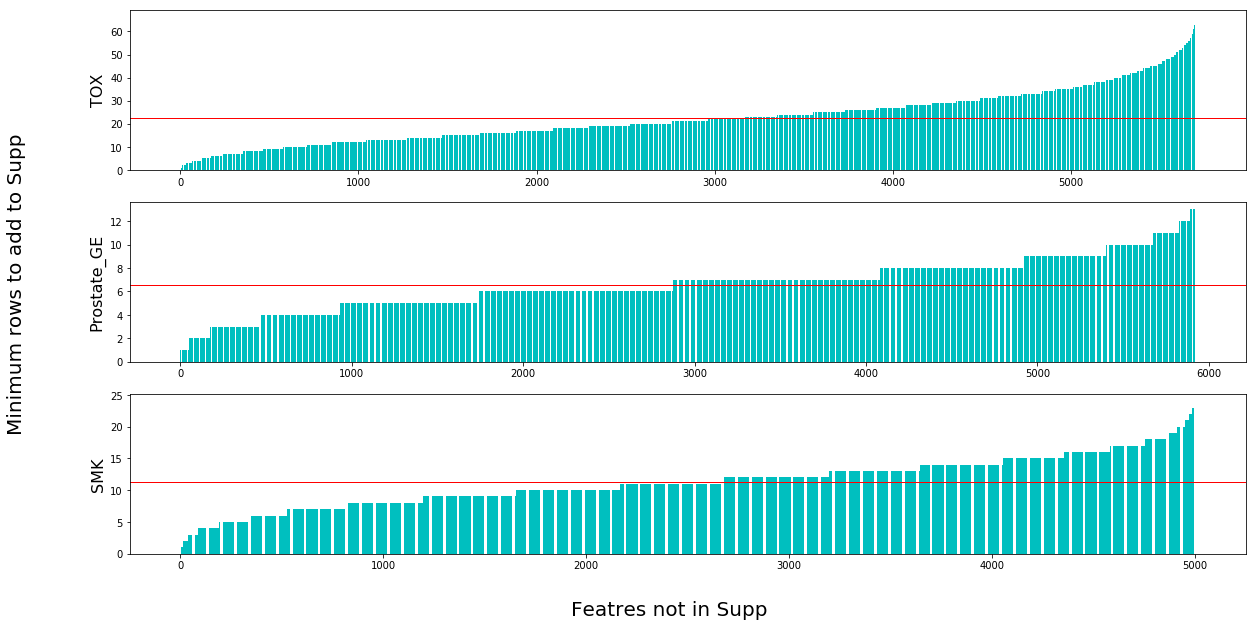

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 10))
fig.text(0.5, 0.04, 'Featres not in Supp', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Minimum rows to add to Supp', va='center', rotation='vertical', fontsize=20)

## TOX ##
mean_k = np.asarray(list(tox_data.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(tox_data.values()))
colors[0] = 'r'

ax1.bar(range(len(tox_data)), list(tox_data.values()), align='center', color=colors)
#x_ticks = []
#for key in list(target_k_dict.keys()):
#    x_ticks.append(str(key))
#plt.xticks(range(len(target_k_dict)), x_ticks, rotation=90)
#plt.xticks([], [])
ax1.axhline(y=mean_k,linewidth=1, color='r')
#ax1.set_xlabel("Features Not in Supp")
#ax1.set_ylabel("Minimum k to add to Supp")
ax1.set(ylabel='TOX')
ax1.yaxis.get_label().set_fontsize(16)

## Prostate ##
mean_k = np.asarray(list(prostate_data.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(prostate_data.values()))
colors[0] = 'r'

ax2.bar(range(len(prostate_data)), list(prostate_data.values()), align='center', color=colors)
#x_ticks = []
#for key in list(target_k_dict.keys()):
#    x_ticks.append(str(key))
#plt.xticks(range(len(target_k_dict)), x_ticks, rotation=90)
#plt.xticks([], [])
ax2.axhline(y=mean_k,linewidth=1, color='r')
#ax1.set_xlabel("Features Not in Supp")
#ax1.set_ylabel("Minimum k to add to Supp")
ax2.set(ylabel='Prostate_GE')
ax2.yaxis.get_label().set_fontsize(16)

### SMK ###
mean_k = np.asarray(list(smk_data.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(smk_data.values()))
colors[0] = 'r'

ax3.bar(range(len(smk_data)), list(smk_data.values()), align='center', color=colors)
#x_ticks = []
#for key in list(target_k_dict.keys()):
#    x_ticks.append(str(key))
#plt.xticks(range(len(target_k_dict)), x_ticks, rotation=90)
#plt.xticks([], [])
ax3.axhline(y=mean_k,linewidth=1, color='r')
#ax1.set_xlabel("Features Not in Supp")
#ax1.set_ylabel("Minimum k to add to Supp")
ax3.set(ylabel='SMK')
ax3.yaxis.get_label().set_fontsize(16)

In [31]:
fig.savefig('final_fulldataset_appendix.png', format='png', dpi=600)

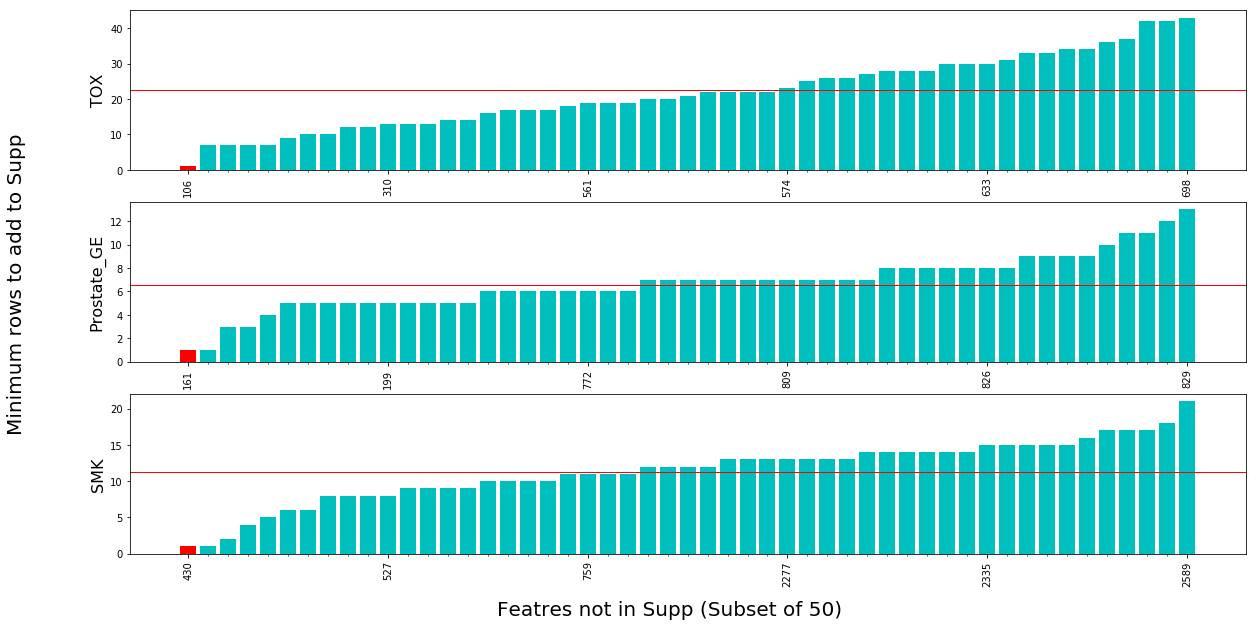

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(20, 10))
size = 50
fig.text(0.5, 0.04, 'Featres not in Supp (Subset of 50)', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Minimum rows to add to Supp', va='center', rotation='vertical', fontsize=20)

### TOX ###
target_k_dict = tox_data
mean_k = np.asarray(list(target_k_dict.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(target_k_dict.values()))
colors[0] = 'r'

min_feature = list(target_k_dict.keys())[0]
min_value = list(target_k_dict.values())[0]

# Randomly sample 'size' number of features to graph (NOT including the minimum)
target_keys = list(target_k_dict.keys()).copy()
target_keys.remove(min_feature)
subset_features = np.random.choice(target_keys, size, replace=False)
subset_values = []
for feature in subset_features:
    subset_values.append(target_k_dict[feature])
subset_features = np.sort(subset_features)
subset_values = np.sort(subset_values)

# Append min feature and value to start of lists
subset_features = np.insert(subset_features, 0, min_feature)
subset_values = np.insert(subset_values, 0, min_value)

ax1.bar(range(len(subset_features)), subset_values, align='center', color=colors)
x_ticks = []
for key in subset_features:
    x_ticks.append(str(key))
ax1.set_xticks(range(len(subset_features)), x_ticks)
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.axhline(y=mean_k,linewidth=1, color='r')
ax1.set(ylabel='TOX')
ax1.yaxis.get_label().set_fontsize(16)

### Prostate_GE ###
target_k_dict = prostate_data
mean_k = np.asarray(list(target_k_dict.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(target_k_dict.values()))
colors[0] = 'r'

min_feature = list(target_k_dict.keys())[0]
min_value = list(target_k_dict.values())[0]

# Randomly sample 'size' number of features to graph (NOT including the minimum)
target_keys = list(target_k_dict.keys()).copy()
target_keys.remove(min_feature)
subset_features = np.random.choice(target_keys, size, replace=False)
subset_values = []
for feature in subset_features:
    subset_values.append(target_k_dict[feature])
subset_features = np.sort(subset_features)
subset_values = np.sort(subset_values)

# Append min feature and value to start of lists
subset_features = np.insert(subset_features, 0, min_feature)
subset_values = np.insert(subset_values, 0, min_value)

ax2.bar(range(len(subset_features)), subset_values, align='center', color=colors)
x_ticks = []
for key in subset_features:
    x_ticks.append(str(key))
ax2.set_xticks(range(len(subset_features)), x_ticks)
ax2.set_xticklabels(x_ticks, rotation=90)
ax2.axhline(y=mean_k,linewidth=1, color='r')
ax2.set(ylabel='Prostate_GE')
ax2.yaxis.get_label().set_fontsize(16)

### SMK ###
target_k_dict = smk_data
mean_k = np.asarray(list(target_k_dict.values())).mean()

# Set color of minimum feature
colors = ['c']*len(list(target_k_dict.values()))
colors[0] = 'r'

min_feature = list(target_k_dict.keys())[0]
min_value = list(target_k_dict.values())[0]

# Randomly sample 'size' number of features to graph (NOT including the minimum)
target_keys = list(target_k_dict.keys()).copy()
target_keys.remove(min_feature)
subset_features = np.random.choice(target_keys, size, replace=False)
subset_values = []
for feature in subset_features:
    subset_values.append(target_k_dict[feature])
subset_features = np.sort(subset_features)
subset_values = np.sort(subset_values)

# Append min feature and value to start of lists
subset_features = np.insert(subset_features, 0, min_feature)
subset_values = np.insert(subset_values, 0, min_value)

ax3.bar(range(len(subset_features)), subset_values, align='center', color=colors)
x_ticks = []
for key in subset_features:
    x_ticks.append(str(key))
ax3.set_xticks(range(len(subset_features)), x_ticks)
ax3.set_xticklabels(x_ticks, rotation=90)
ax3.axhline(y=mean_k,linewidth=1, color='r')
ax3.set(ylabel='SMK')
ax3.yaxis.get_label().set_fontsize(16)

In [39]:
fig.savefig('50_fulldataset_appendix.png', format='png', dpi=600)